In [99]:

# from torch.utils.data import TensorDataset, DataLoader

# from transformers import AutoModelForSequenceClassification






# import joblib



# Import Classes

In [11]:
import pandas as pd
import numpy as np

import random
import itertools
from sklearn import metrics
from tqdm.auto import tqdm

import torch

from src.utils import confoundSplit, confoundSplitNumbers, confoundSplitDF

from src.NeuralModel import TransformerDataset, NeuralModel



# Initialize Model

In [5]:
num_labels = 1

pretrained = 'bert-base-uncased'
device = 'cuda:0'

max_length = 120
num_epochs = 20
problem_type = 'multi_label_classification'
hidden_dropout_prob = 0.1
num_warmup_steps = 0
batch_size = 50


lr = 5e-5
grad_norm = 1.0
balance_weights = False



In [6]:

model_config = {}
# model_config['model_type'] = model_type
model_config["pretrained"] = pretrained
model_config["max_length"] = max_length
model_config["num_labels"] = num_labels
model_config["hidden_dropout_prob"] = hidden_dropout_prob
model_config["num_epochs"] = num_epochs
model_config["num_warmup_steps"] = num_warmup_steps
model_config["batch_size"] = batch_size
model_config["lr"] = lr
model_config["balance_weights"] = balance_weights
model_config["grad_norm"] = grad_norm


In [7]:
model = NeuralModel(**model_config)

# Load Data

In [8]:
# Use ADReSS Train for now
df = pd.read_csv("/edata/ADReSS-IS2020-data/dataframes/adre_train.csv")

In [9]:
df

,Unnamed: 0,sentence_source,label,sentence
0,6,S094.txt,1,oh yes a little girl and the little boy is ...
1,0,S138.txt,1,the the water's flowing on the floor and sh...
2,30,S118.txt,1,oh there's a cookie jar and a youngster with ...
3,37,S114.txt,1,mhm well the kids is robbing a cookie jar ...
4,49,S143.txt,1,well little boy reaching out for the cookie j...
...,...,...,...,...
103,55,S032.txt,0,well the little girl is saying to be quiet to...
104,15,S097.txt,1,an average home that looks very much like our...
105,56,S016.txt,0,well the girl is watching the boy go into the...
106,61,S061.txt,0,alright boy is getting into the cookie jar ...


In [11]:
X = df['sentence']
y = df[['label']]

# Training

In [12]:
model.load_pretrained()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [13]:
model.trainModel(X=X, y=y, device='cuda:0')

  0%|          | 0/18 [00:00<?, ?it/s]

# Predict

In [14]:
# Use ADReSS Train for now
df = pd.read_csv("/edata/ADReSS-IS2020-data/dataframes/adre_test.csv")

In [15]:
df

,Unnamed: 0,sentence_source,label,sentence
0,0,S203.txt,1,okay the boy's in the cookie jar he's he's ...
1,1,S179.txt,1,well the stool the stool the sink is runnin...
2,2,S184.txt,0,young boy is up at the cookie jar he has th...
3,3,S191.txt,1,mhm well she's spilling the water from from...
4,4,S169.txt,1,well the sink is running over she's drying ...
5,5,S205.txt,1,well the little kid's falling off his stool ...
6,6,S202.txt,0,tell me oh oh by looking at the okay ...
7,7,S201.txt,0,well the boy is getting cookies and he's gonn...
8,8,S190.txt,1,the girl's in the trying did i get that a...
9,9,S195.txt,0,okay well in the first place the the mother...


In [16]:
X = df['sentence']
y = df[['label']]

In [17]:
y_pred, y_prob = model.predict(X=X, device="cuda:0")



  0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df.assign(y_pred=y_pred,
          y_prob=y_prob
         )

,Unnamed: 0,sentence_source,label,sentence,y_pred,y_prob
0,0,S203.txt,1,okay the boy's in the cookie jar he's he's ...,0,0.478423
1,1,S179.txt,1,well the stool the stool the sink is runnin...,1,0.823035
2,2,S184.txt,0,young boy is up at the cookie jar he has th...,1,0.839933
3,3,S191.txt,1,mhm well she's spilling the water from from...,1,0.570524
4,4,S169.txt,1,well the sink is running over she's drying ...,1,0.842292
5,5,S205.txt,1,well the little kid's falling off his stool ...,1,0.646560
6,6,S202.txt,0,tell me oh oh by looking at the okay ...,1,0.841245
7,7,S201.txt,0,well the boy is getting cookies and he's gonn...,1,0.837790
8,8,S190.txt,1,the girl's in the trying did i get that a...,1,0.853038
9,9,S195.txt,0,okay well in the first place the the mother...,1,0.833782


In [19]:
loss = torch.nn.BCELoss()

In [20]:
torch.FloatTensor(y_prob.loc[:,0])

tensor([0.4784, 0.8230, 0.8399, 0.5705, 0.8423, 0.6466, 0.8412, 0.8378, 0.8530,
        0.8338, 0.5336, 0.8538, 0.5258, 0.5532, 0.4660, 0.6070, 0.4799, 0.7509,
        0.7125, 0.7617, 0.8459, 0.8253, 0.7044, 0.7083, 0.8599, 0.4656, 0.8256,
        0.8392, 0.5806, 0.6127, 0.8393, 0.8405, 0.5760, 0.8520, 0.5498, 0.8448,
        0.5840, 0.8514, 0.5056, 0.8632, 0.8335, 0.8476, 0.7229, 0.6941, 0.8200,
        0.5141, 0.5102, 0.5112])

In [21]:
loss(torch.FloatTensor(y_prob.loc[:,0]), torch.FloatTensor(df['label']))

tensor(0.8594)

# Test Mixing...

## Load WLS and ADReSS

### WLS

In [13]:

df_wls = pd.read_csv("/edata/TRESTLE/testWLS.tsv", sep='\t')

df_wls_label = pd.read_csv("/edata/TRESTLE/WLS-labels.csv")

df_wls_merge = df_wls.merge(df_wls_label, left_on='file', right_on='idtlkbnk', how='inner')

df_wls_merge.rename(columns={"> 1 sd below mean for normals ages 60-79 (Tombaugh, Kozak, & Rees, 1999) -- normal cutoff = 12+ for 9-12 yrs eductation, 14+ for 13-21 yrs education":
                             "label",
                             
                            },
                    inplace=True
                   )

df_wls_merge.loc[df_wls_merge['label'] == 'y','label'] = 'Y'

condlist = [
    df_wls_merge['label'] == 'Y',
    df_wls_merge['label'] == 'N',
    df_wls_merge['label'].isna()
]
choicelist = [
    1,
    0,
    np.nan
]

df_wls_merge['label'] = np.select(condlist, choicelist)

df_wls_merge = df_wls_merge.loc[df_wls_merge['label'].notna(), :].reset_index(drop=True)

### ADReSS

In [14]:
df_adress_train = pd.read_csv("/edata/ADReSS-IS2020-data/dataframes/adre_train.csv")

df_adress_test = pd.read_csv("/edata/ADReSS-IS2020-data/dataframes/adre_test.csv")

df_adress = pd.concat([df_adress_train, df_adress_test], ignore_index=True)

df_adress.rename(columns={"sentence": "text"}, inplace=True)

## Mixing

In [29]:

combination = (0.201, 0.6010000000000001, 0.30100000000000005, 1.0, 4)
ret = confoundSplitNumbers(df0=df_wls_merge, df1=df_adress, 
                            df0_label='label', df1_label='label',

                            p_pos_train_z0=combination[0], p_pos_train_z1 = combination[1], p_mix_z1 = combination[2], alpha_test = combination[3],

                            train_test_ratio = combination[4],
                           )

In [30]:
ret

{'n_df0_train_pos': 54,
 'n_df0_test_pos': 22,
 'n_df0_train_neg': 217,
 'n_df0_test_neg': 46,
 'n_df1_train_pos': 69,
 'n_df1_test_pos': 9,
 'n_df1_train_neg': 46,
 'n_df1_test_neg': 19,
 'mix_param_dict': {'p_pos_train_z0': 0.201,
  'p_pos_train_z1': 0.6010000000000001,
  'p_pos_train': 0.3214000000000001,
  'p_pos_test': 0.3214000000000001,
  'p_mix_z0': 0.699,
  'p_mix_z1': 0.30100000000000005,
  'alpha_train': 2.9900497512437814,
  'alpha_test': 1.0,
  'p_pos_test_z0': 0.3214000000000001,
  'p_pos_test_z1': 0.3214000000000001,
  'C_y': 0.3214000000000001,
  'C_z': 0.30100000000000005}}

In [40]:
combination = (0.201, 0.6010000000000001, 0.30100000000000005, 1.0, 4)
ret = confoundSplitDF(df0=df_wls_merge, df1=df_adress, 
                            df0_label='label', df1_label='label',

                            p_pos_train_z0=combination[0], p_pos_train_z1 = combination[1], p_mix_z1 = combination[2], alpha_test = combination[3],

                            train_test_ratio = combination[4],
                           )

In [41]:
ret['stats']

{'n_df0_train_pos': 54,
 'n_df0_test_pos': 22,
 'n_df0_train_neg': 217,
 'n_df0_test_neg': 46,
 'n_df1_train_pos': 69,
 'n_df1_test_pos': 9,
 'n_df1_train_neg': 46,
 'n_df1_test_neg': 19,
 'mix_param_dict': {'p_pos_train_z0': 0.201,
  'p_pos_train_z1': 0.6010000000000001,
  'p_pos_train': 0.3214000000000001,
  'p_pos_test': 0.3214000000000001,
  'p_mix_z0': 0.699,
  'p_mix_z1': 0.30100000000000005,
  'alpha_train': 2.9900497512437814,
  'alpha_test': 1.0,
  'p_pos_test_z0': 0.3214000000000001,
  'p_pos_test_z1': 0.3214000000000001,
  'C_y': 0.3214000000000001,
  'C_z': 0.30100000000000005}}

In [42]:
ret

{'sample_df0_train':            file                                               text  \
 0    2000001852  The um little boy is getting cookies outof the...   
 1    2000016559  Well the stool is tipping. The girl is gigglin...   
 2    2000006083  Water spilling outof the sink. A kid falling o...   
 3    2000000195  Um kids not getting ki kids getting into troub...   
 4    2000009355  Sink's overflowing. Lady's doing dishes. The b...   
 ..          ...                                                ...   
 266  2000009539  Well the boy is on the stool. The stool is tip...   
 267  2000000333  The girl wants a cookie. The boy is fallen off...   
 268  2000012617  A boy in a cookie jar. A girl with her hand ou...   
 269  2000014845  The boy is standing on the stool. And he's the...   
 270  2000013526  I see a lady who appears to be the mother wash...   
 
        idtlkbnk  age 2011  education  category fluency version, 2011  \
 0    2000001852        72         16                

In [43]:
df0_train = ret['sample_df0_train']

# Use Mixing for Prediction

## Load Data

In [145]:
# combination = (0.201, 0.6010000000000001, 0.30100000000000005, 1.0, 4)

combination = (0.201, 0.7010000000000001, 0.501, 1.4000000000000001, 4)
ret = confoundSplitDF(df0=df_wls_merge, df1=df_adress, 
                      df0_label='label', df1_label='label',
                      p_pos_train_z0=combination[0], 
                      p_pos_train_z1 = combination[1], 
                      p_mix_z1 = combination[2], 
                      alpha_test = combination[3],
                      train_test_ratio = combination[4],
                      random_state=13
                           )

In [146]:
df_train = pd.concat([ret['sample_df0_train'][['text', 'label']], ret['sample_df1_train'][['text', 'label']]], ignore_index=True)

In [147]:
df_test = pd.concat([ret['sample_df0_test'][['text', 'label']], ret['sample_df1_test'][['text', 'label']]], ignore_index=True)

In [148]:
X_train = df_train['text']
y_train = df_train[['label']]

X_test = df_test['text']
y_test = df_test[['label']]

In [149]:
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

181
181
44
44


## Training -  Test for LR and Epochs..

In [150]:
num_labels = 1

pretrained = 'bert-base-uncased'
device = 'cuda:0'

max_length = 120
num_epochs = 10
problem_type = 'multi_label_classification'
hidden_dropout_prob = 0.1
num_warmup_steps = 0
batch_size = 50


lr = 1e-5
grad_norm = 1.0
balance_weights = False



In [151]:

model_config = {}
# model_config['model_type'] = model_type
model_config["pretrained"] = pretrained
model_config["max_length"] = max_length
model_config["num_labels"] = num_labels
model_config["hidden_dropout_prob"] = hidden_dropout_prob
model_config["num_epochs"] = num_epochs
model_config["num_warmup_steps"] = num_warmup_steps
model_config["batch_size"] = batch_size
model_config["lr"] = lr
model_config["balance_weights"] = balance_weights
model_config["grad_norm"] = grad_norm


In [152]:
model = NeuralModel(**model_config)

In [153]:
model.load_pretrained()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [154]:
model.trainModelWithTest(X=X_train, y=y_train, X_test=X_test, y_test=y_test, device='cuda:0')

  0%|          | 0/40 [00:00<?, ?it/s]

In [142]:
import matplotlib.pyplot as plt

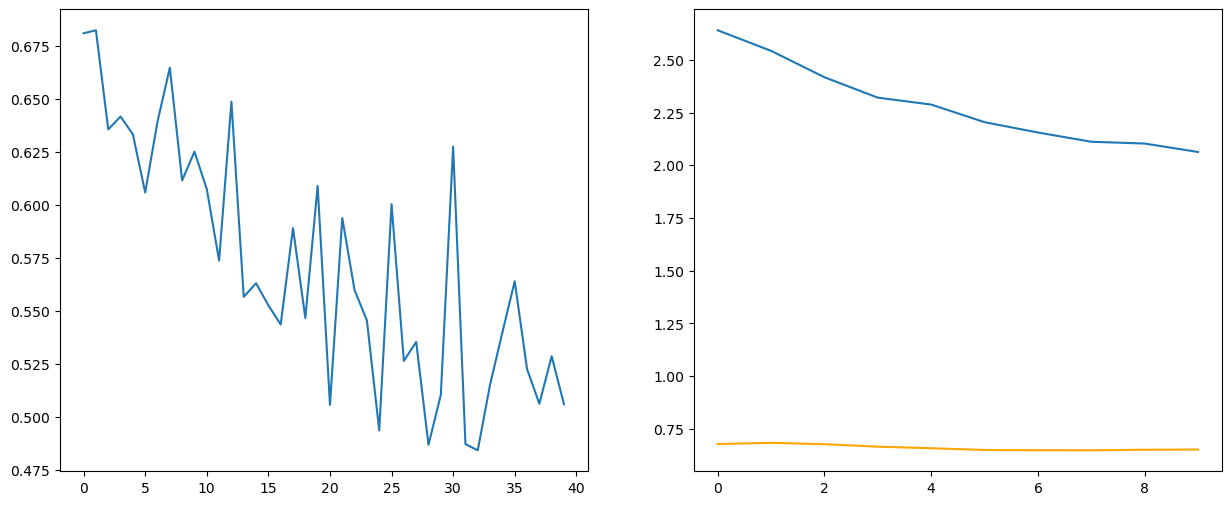

In [155]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].plot(model.loss_steps)
ax[1].plot(model.loss_epochs)
ax[1].plot(model.loss_test_epochs, c='orange')


Text(0.5, 1.0, 'epoch=10, lr=1e-05')

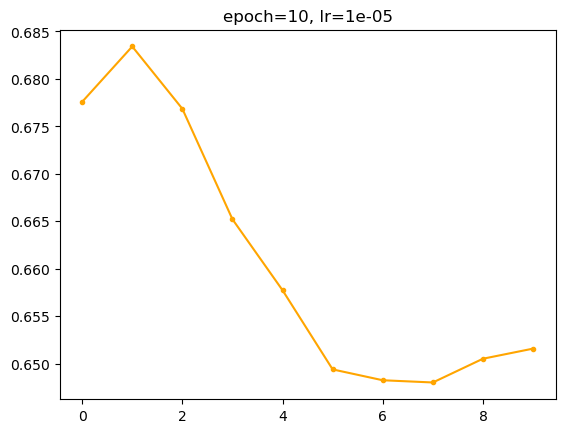

In [156]:
plt.plot(model.loss_test_epochs, c='orange', marker=".")
plt.title(f"epoch={num_epochs}, lr={lr}")

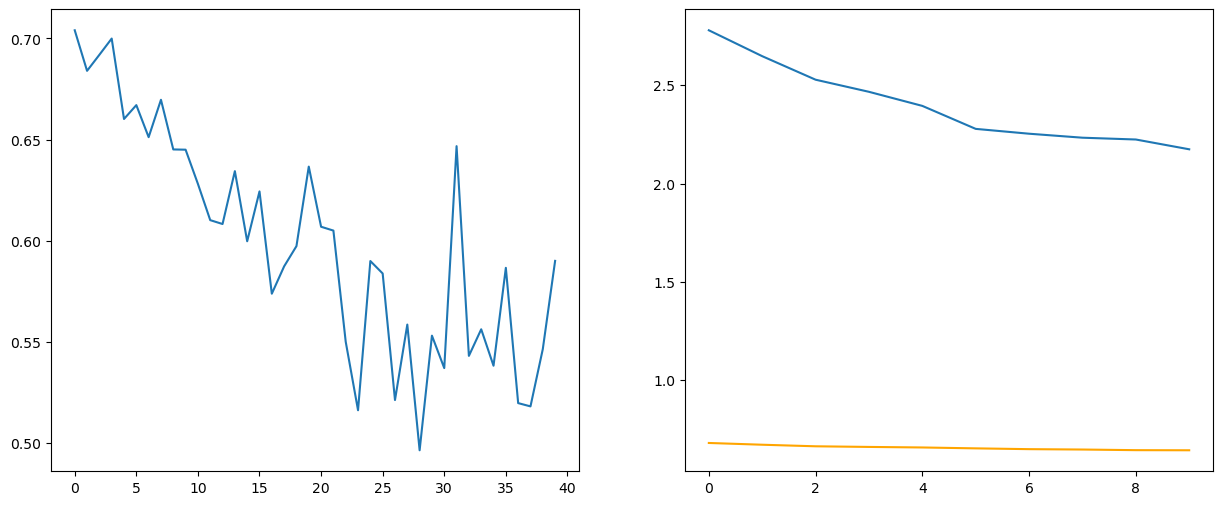

In [143]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].plot(model.loss_steps)
ax[1].plot(model.loss_epochs)
ax[1].plot(model.loss_test_epochs, c='orange')


Text(0.5, 1.0, 'epoch=10, lr=1e-05')

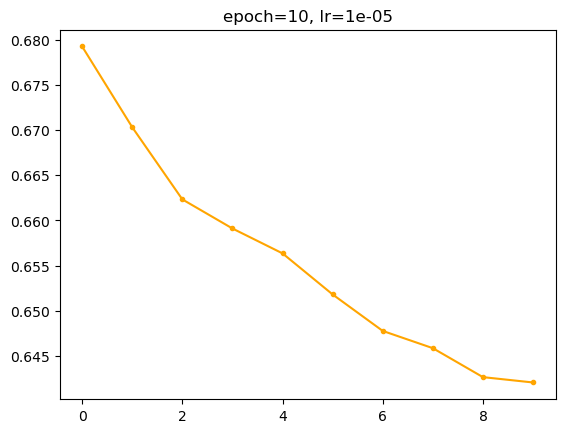

In [144]:
plt.plot(model.loss_test_epochs, c='orange', marker=".")
plt.title(f"epoch={num_epochs}, lr={lr}")

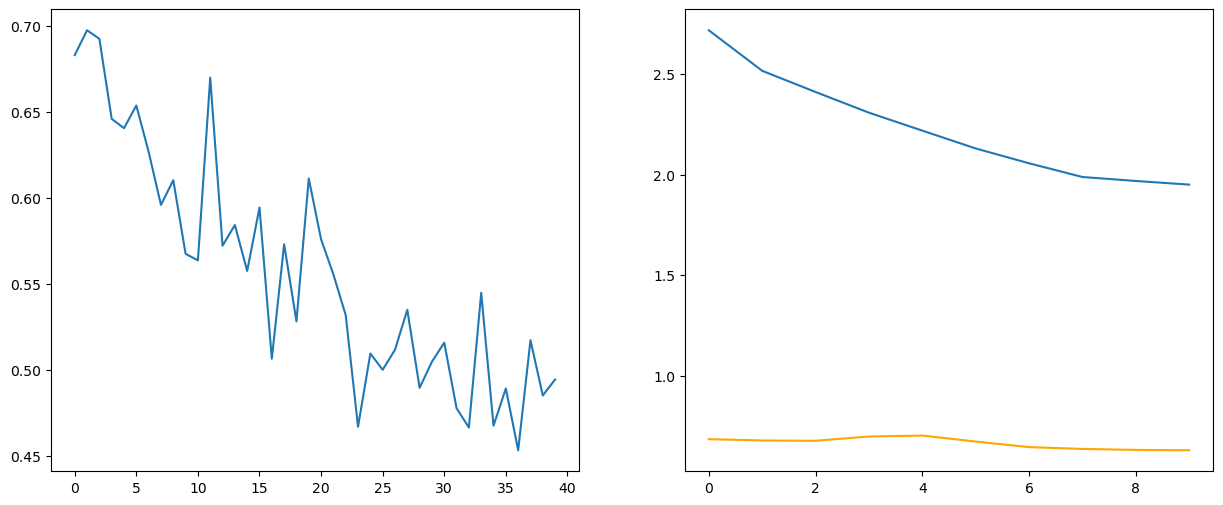

In [130]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].plot(model.loss_steps)
ax[1].plot(model.loss_epochs)
ax[1].plot(model.loss_test_epochs, c='orange')


Text(0.5, 1.0, 'epoch=10, lr=1e-05')

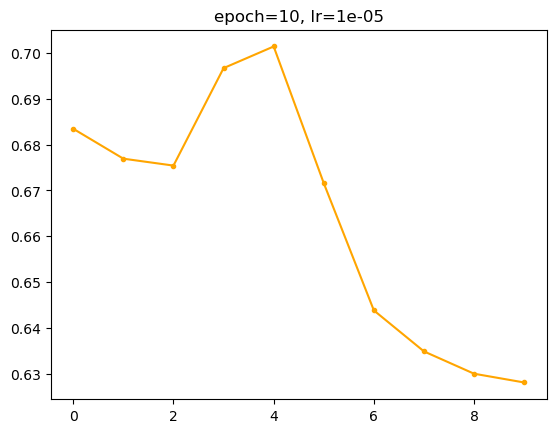

In [131]:
plt.plot(model.loss_test_epochs, c='orange', marker=".")
plt.title(f"epoch={num_epochs}, lr={lr}")

## Training

In [234]:
num_labels = 1

pretrained = 'bert-base-uncased'
device = 'cuda:0'

max_length = 120
num_epochs = 6
problem_type = 'multi_label_classification'
hidden_dropout_prob = 0.1
num_warmup_steps = 0
batch_size = 50


lr = 1e-5
grad_norm = 1.0
balance_weights = False



In [235]:

model_config = {}
# model_config['model_type'] = model_type
model_config["pretrained"] = pretrained
model_config["max_length"] = max_length
model_config["num_labels"] = num_labels
model_config["hidden_dropout_prob"] = hidden_dropout_prob
model_config["num_epochs"] = num_epochs
model_config["num_warmup_steps"] = num_warmup_steps
model_config["batch_size"] = batch_size
model_config["lr"] = lr
model_config["balance_weights"] = balance_weights
model_config["grad_norm"] = grad_norm


In [236]:
model = NeuralModel(**model_config)

In [237]:
model.load_pretrained()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [238]:
model.trainModel(X=X_train, y=y_train,  device='cuda:0')

  0%|          | 0/24 [00:00<?, ?it/s]

## Predict

In [247]:
y_pred, y_prob = model.predict(X=X_test, device="cuda:0")



  0%|          | 0/1 [00:00<?, ?it/s]

In [248]:
loss = torch.nn.BCELoss()

In [249]:
torch.FloatTensor(y_prob.loc[:,0])

tensor([0.3877, 0.3520, 0.3450, 0.3472, 0.3445, 0.3541, 0.3759, 0.3414, 0.3440,
        0.3126, 0.3829, 0.3469, 0.4174, 0.3619, 0.4092, 0.3760, 0.4296, 0.3915,
        0.4377, 0.3969, 0.3794, 0.4115, 0.3527, 0.4753, 0.4670, 0.5518, 0.4585,
        0.5489, 0.5295, 0.5461, 0.4961, 0.4916, 0.5334, 0.5329, 0.5514, 0.4625,
        0.5233, 0.4828, 0.5041, 0.5114, 0.5629, 0.5293, 0.4912, 0.4832])

In [250]:
loss(torch.FloatTensor(y_prob.loc[:,0]), torch.FloatTensor(y_test['label']))

tensor(0.6719)

# Multiple Tests for mixing

## Base Config

In [4]:
num_labels = 1

pretrained = 'bert-base-uncased'
device = 'cuda:0'

max_length = 120
num_epochs = 6
problem_type = 'multi_label_classification'
hidden_dropout_prob = 0.1
num_warmup_steps = 0
batch_size = 50


lr = 1e-5
grad_norm = 1.0
balance_weights = False



In [5]:

model_config = {}
# model_config['model_type'] = model_type
model_config["pretrained"] = pretrained
model_config["max_length"] = max_length
model_config["num_labels"] = num_labels
model_config["hidden_dropout_prob"] = hidden_dropout_prob
model_config["num_epochs"] = num_epochs
model_config["num_warmup_steps"] = num_warmup_steps
model_config["batch_size"] = batch_size
model_config["lr"] = lr
model_config["balance_weights"] = balance_weights
model_config["grad_norm"] = grad_norm


## 5 Random Runs: Train and Predict

### Get Combinations

In [6]:
# itertools.product([0.1], 
#                                     [0.5], 
#                                      np.arange(0.1, 0.999, 0.1),
#                                      np.arange(0,10,0.1),
#                                      [4]
                  
# itertools.product([0.2], 
#                                     [0.4], 
#                                      np.arange(0.1, 0.999, 0.1),
#                                      np.arange(0,10,0.1),
#                                      [4] 

In [7]:

valid_high_combinations = []

for combination in itertools.product([0.2], 
                                    [0.4], 
                                     np.arange(0.1, 0.999, 0.1),
                                     np.arange(0,10,0.1),
                                     [4]
                                     
                                    ):
    
    ret = confoundSplitNumbers(df0=df_wls_merge, df1=df_adress, 
                        df0_label='label', df1_label='label',

                        p_pos_train_z0=combination[0], p_pos_train_z1 = combination[1], p_mix_z1 = combination[2], alpha_test = combination[3],

                        train_test_ratio = combination[4],
                       )
   
    if (ret is not None) and (ret['n_df0_train_pos'] >= 10) and (combination[4] == 4): # valie high combos
        valid_high_combinations.append(combination)
        
    

In [8]:
del combination

In [9]:
len(valid_high_combinations)

530

### Run Train + Predict

In [ ]:
losses_dict = {}

losses_dict['combination'] = []
losses_dict['losses'] = []
losses_dict['auroc'] = []
losses_dict['auprc'] = []
losses_dict['f1_at_05'] = []


random.seed(29)

for c in tqdm(valid_high_combinations):
    losses_dict['combination'].append(c)
    
    losses = []
    _auroc = []
    _auprc = []    
    _f1_at_05 = []
    
    for i in range(5):
        _rand = random.randint(0,1000)    

        combination = c
        # combination = (0.201, 0.6, 0.3, 1.0, 4)
        # combination = (0.201, 0.7, 0.5, 1.4, 4)
        ret = confoundSplitDF(df0=df_wls_merge, df1=df_adress, 
                              df0_label='label', df1_label='label',
                              p_pos_train_z0=combination[0], 
                              p_pos_train_z1 = combination[1], 
                              p_mix_z1 = combination[2], 
                              alpha_test = combination[3],
                              train_test_ratio = combination[4],
                              random_state= _rand
                                   )

        df_train = pd.concat([ret['sample_df0_train'][['text', 'label']], ret['sample_df1_train'][['text', 'label']]], ignore_index=True)

        df_test = pd.concat([ret['sample_df0_test'][['text', 'label']], ret['sample_df1_test'][['text', 'label']]], ignore_index=True)



        X_train = df_train['text']
        y_train = df_train[['label']]

        X_test = df_test['text']
        y_test = df_test[['label']]



        model = NeuralModel(**model_config)

        model.load_pretrained()

        model.trainModel(X=X_train, y=y_train,  device='cuda:0')



        y_pred, y_prob = model.predict(X=X_test, device="cuda:0")

        

        loss = torch.nn.BCELoss()

        _loss = loss(torch.FloatTensor(y_prob.loc[:,0]), torch.FloatTensor(y_test['label']))

        losses.append(_loss.item())
        
        _auroc.append(metrics.roc_auc_score(y_true=y_test['label'], y_score=y_prob))
        _auprc.append(metrics.average_precision_score(y_true=y_test['label'], y_score=y_prob))
        _f1_at_05.append(metrics.f1_score(y_true=y_test['label'], y_pred=y_pred))
    
    losses_dict['losses'].append(losses)
    losses_dict['auroc'].append(_auroc)
    losses_dict['auprc'].append(_auprc)
    losses_dict['f1_at_05'].append(_f1_at_05)
    

## Output Results

In [27]:
import pickle

In [29]:
with open("output/results_varying_alpha_2.pkl", "wb") as f:
    pickle.dump(obj=losses_dict, file=f)

In [30]:
!ls -lrt output

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
total 448
drwxrwxr-x 2 xiruod xiruod   4096 Oct 26 23:33 saved_model
-rw-rw-r-- 1 xiruod xiruod 136605 Oct 29 08:21 results_varying_alpha_0.pkl
-rw-rw-r-- 1 xiruod xiruod 221997 Oct 30 01:13 results_varying_alpha_1.pkl
-rw-rw-r-- 1 xiruod xiruod  62371 Nov 17 21:49 results_varying_alpha_2.pkl


## Results & Make Plots

### Collect from Pickles

In [3]:
import pickle
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
with open("output/results_varying_alpha_0.pkl", "rb") as f:
    losses_0 = pickle.load(f)

In [6]:
with open("output/results_varying_alpha_1.pkl", "rb") as f:
    losses_1 = pickle.load(f)

In [7]:
with open("output/results_varying_alpha_2.pkl", "rb") as f:
    losses_2 = pickle.load(f)

In [8]:
losses_dict = {}

losses_dict['combination'] = []
losses_dict['losses'] = []

for _dict in (losses_0, losses_1, losses_2):
    losses_dict['combination'].extend(_dict['combination'])
    losses_dict['losses'].extend(_dict['losses'])

In [6]:
losses_1.keys()

dict_keys(['combination', 'losses', 'auroc', 'auprc', 'f1_at_05'])

### Plots

In [9]:
def getTestPos(c, z):
    ret = confoundSplitNumbers(df0=df_wls_merge, df1=df_adress, 
                            df0_label='label', df1_label='label',

                            p_pos_train_z0=c[0], p_pos_train_z1 = c[1], p_mix_z1 = c[2], alpha_test = c[3],

                            train_test_ratio = c[4],
                           )
    if z == "z0":
        
        return ret['mix_param_dict']['p_pos_test_z0']
    elif z == "z1":
        return ret['mix_param_dict']['p_pos_test_z1']

In [75]:
def plotAlphaPmix(losses, alpha_train, key_metric:['auroc', 'auprc','losses','f1_at_05']):
    
    

    tmp = pd.DataFrame.from_dict({c:losses[key_metric][idx] for idx,c in enumerate(losses['combination'])},
                                 orient="index"
                                )

    tmp = tmp.reset_index()

    tmp = pd.melt(tmp, id_vars="index", value_vars=[0,1,2,3,4])

    tmp = tmp.assign(p_mix_z1=np.array(list(tmp['index']))[:,2], alpha_test=np.array(list(tmp['index']))[:,3])

    tmp['p_pos_test_z0'] = tmp['index'].apply(lambda x: getTestPos(x,z="z0"))
    tmp['p_pos_test_z1'] = tmp['index'].apply(lambda x: getTestPos(x,z="z1"))




    plt.figure(figsize=(12,10))

    g = sns.FacetGrid(tmp, col="p_mix_z1", col_wrap=3)

    g.map_dataframe(sns.lineplot, x="alpha_test", y="value")

    g.map(plt.axvline, x=alpha_train, ls='--', c='red', linewidth=1)

    g.set(ylabel=key_metric)
    
    return tmp

In [60]:
def plotAlphaDiffPmix(losses, alpha_diff_train, key_metric:['auroc', 'auprc','losses','f1_at_05']):
    
    

    tmp = pd.DataFrame.from_dict({c:losses[key_metric][idx] for idx,c in enumerate(losses['combination'])},
                                 orient="index"
                                )

    tmp = tmp.reset_index()

    tmp = pd.melt(tmp, id_vars="index", value_vars=[0,1,2,3,4])

    tmp = tmp.assign(p_mix_z1=np.array(list(tmp['index']))[:,2], alpha_test=np.array(list(tmp['index']))[:,3])

    tmp['p_pos_test_z0'] = tmp['index'].apply(lambda x: getTestPos(x,z="z0"))
    tmp['p_pos_test_z1'] = tmp['index'].apply(lambda x: getTestPos(x,z="z1"))

    tmp['p_test_diff'] = tmp['p_pos_test_z1'] - tmp['p_pos_test_z0']



    plt.figure(figsize=(12,10))

    g = sns.FacetGrid(tmp, col="p_mix_z1", col_wrap=3)

    g.map_dataframe(sns.lineplot, x="p_test_diff", y="value")

    g.map(plt.axvline, x=alpha_diff_train, ls='--', c='red', linewidth=1)

    g.set(ylabel=key_metric)

    return tmp

In [29]:
losses_0.keys()

dict_keys(['combination', 'losses', 'auroc', 'auprc', 'f1_at_05'])

<Figure size 1200x1000 with 0 Axes>

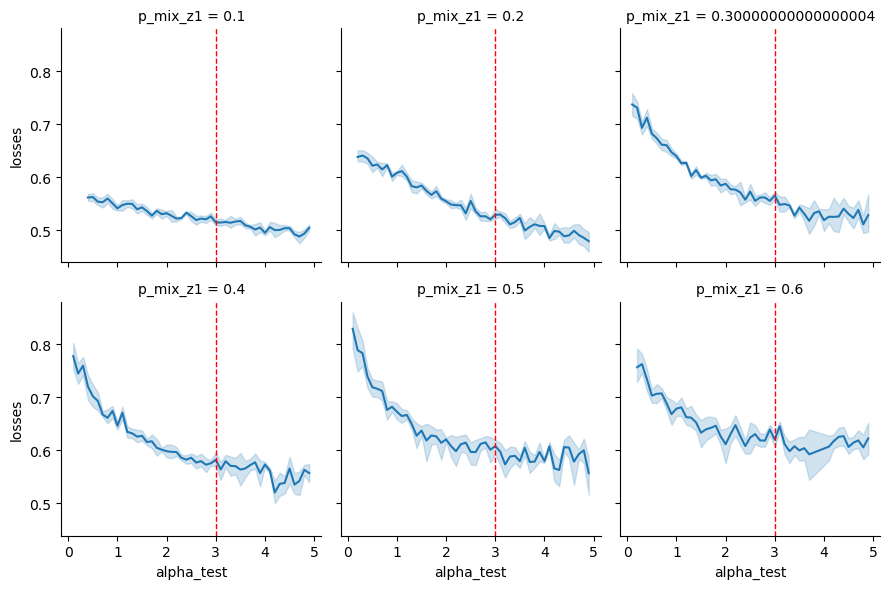

In [30]:
plotAlphaPmix(losses=losses_0, alpha_train=3, key_metric='losses')

<Figure size 1200x1000 with 0 Axes>

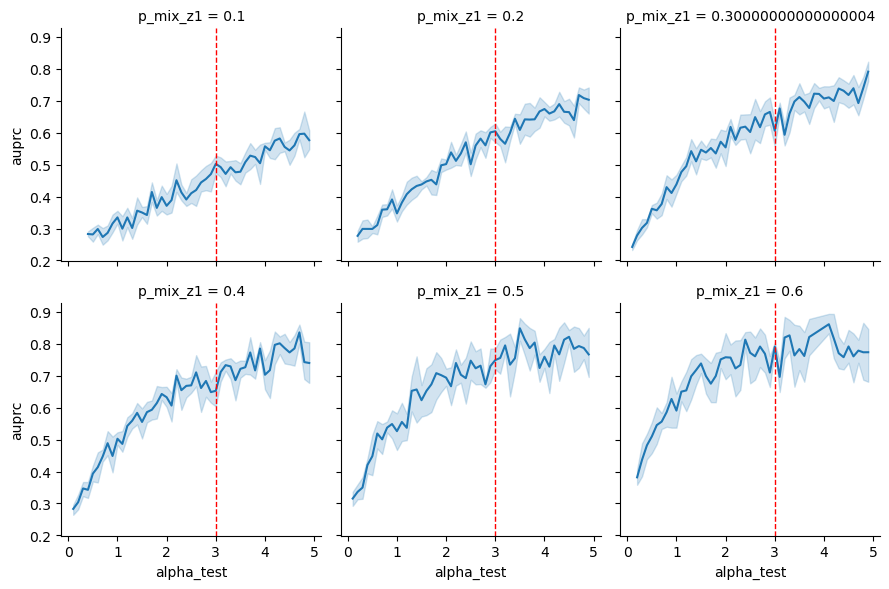

In [31]:
plotAlphaPmix(losses=losses_0, alpha_train=3, key_metric='auprc')

<Figure size 1200x1000 with 0 Axes>

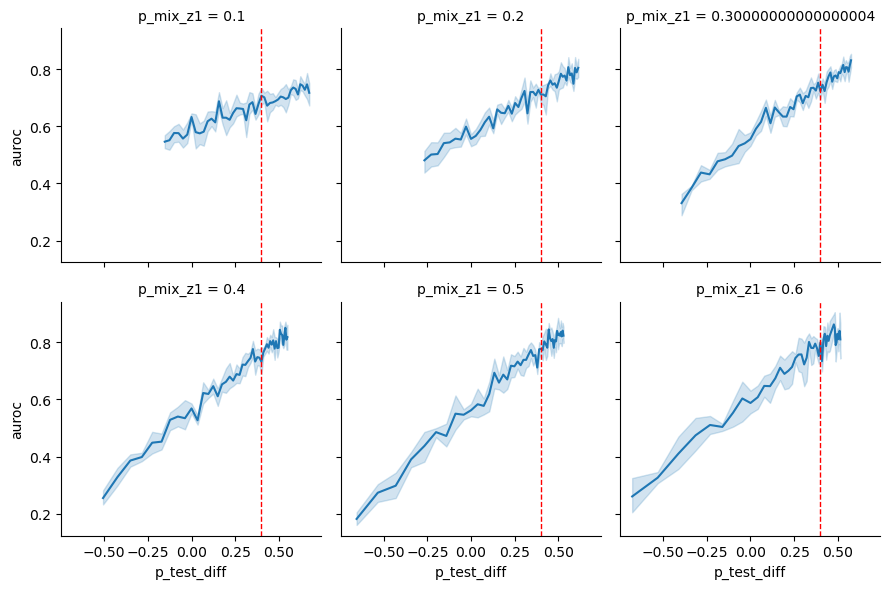

In [69]:
tmp = plotAlphaDiffPmix(losses=losses_0, alpha_diff_train=0.4, key_metric="auroc")

In [112]:
tmp.query("(variable == 0) and (alpha_test == 3)")

,index,variable,value,p_mix_z1,alpha_test,p_pos_test_z0,p_pos_test_z1
26,"(0.2, 0.6, 0.1, 3.0, 4)",0,0.539336,0.1,3.0,0.2,0.6
74,"(0.2, 0.6, 0.2, 3.0, 4)",0,0.545163,0.2,3.0,0.2,0.6
123,"(0.2, 0.6, 0.30000000000000004, 3.0, 4)",0,0.631362,0.3,3.0,0.2,0.6
172,"(0.2, 0.6, 0.4, 3.0, 4)",0,0.752143,0.4,3.0,0.2,0.6
221,"(0.2, 0.6, 0.5, 3.0, 4)",0,0.813357,0.5,3.0,0.2,0.6
269,"(0.2, 0.6, 0.6, 3.0, 4)",0,0.774956,0.6,3.0,0.2,0.6


Text(0, 0.5, 'p_pos_test')

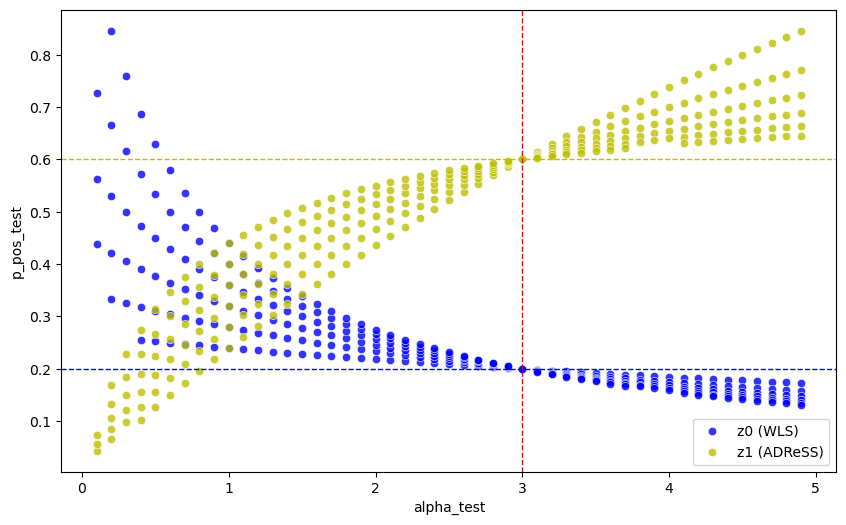

In [126]:
fig, ax = plt.subplots(figsize=(10,6))


sns.scatterplot(x="alpha_test", y="p_pos_test_z0", data=tmp[tmp['variable']==0], color="b", ax=ax, label="z0 (WLS)", alpha=0.8)
sns.scatterplot(x="alpha_test", y="p_pos_test_z1", data=tmp[tmp['variable']==0], color="y", ax=ax, label="z1 (ADReSS)", alpha=0.8)

ax.axhline(y=0.2, c="b", ls="--", linewidth=1)
ax.axhline(y=0.6, c="y", ls="--", linewidth=1)

ax.axvline(x=3, c="r", ls="--", linewidth=1)

ax.set_ylabel("p_pos_test")

<Figure size 1200x1000 with 0 Axes>

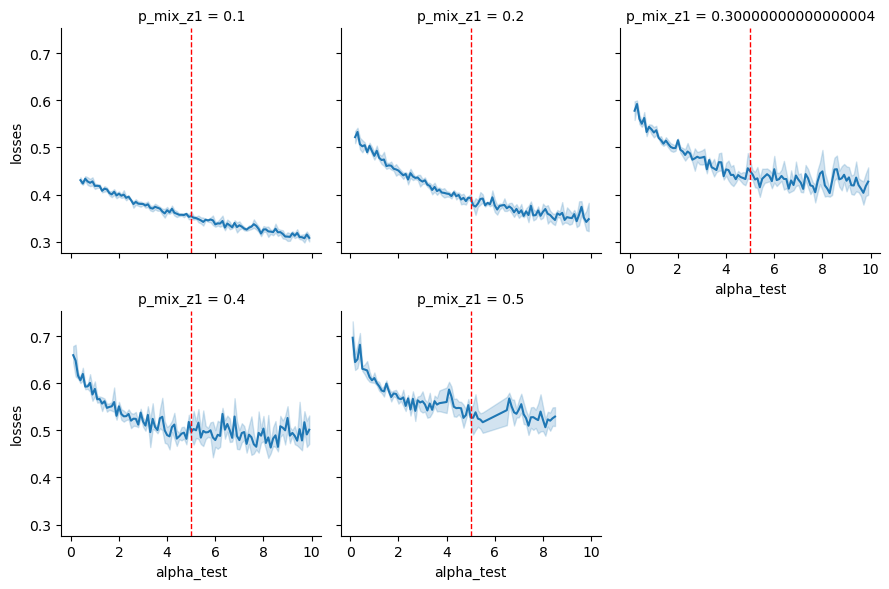

In [35]:
plotAlphaPmix(losses=losses_1, alpha_train=5, key_metric='losses')

<Figure size 1200x1000 with 0 Axes>

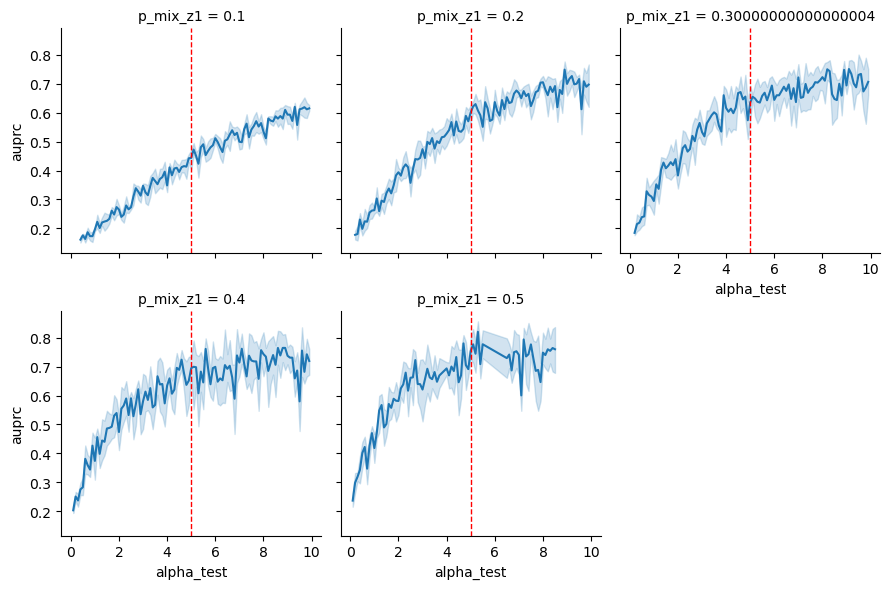

In [36]:
plotAlphaPmix(losses=losses_1, alpha_train=5, key_metric='auprc')

<Figure size 1200x1000 with 0 Axes>

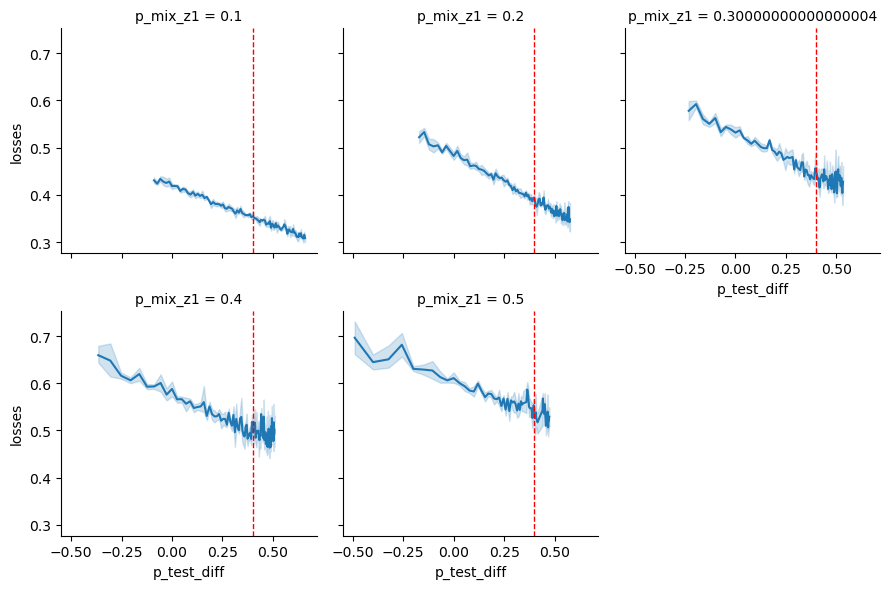

In [127]:
tmp = plotAlphaDiffPmix(losses=losses_1, alpha_diff_train=0.4, key_metric="losses")

In [129]:
tmp

,index,variable,value,p_mix_z1,alpha_test,p_pos_test_z0,p_pos_test_z1,p_test_diff
0,"(0.1, 0.5, 0.1, 0.4, 4)",0,0.421476,0.1,0.4,0.148936,0.059574,-0.089362
1,"(0.1, 0.5, 0.1, 0.5, 4)",0,0.421633,0.1,0.5,0.147368,0.073684,-0.073684
2,"(0.1, 0.5, 0.1, 0.6000000000000001, 4)",0,0.432158,0.1,0.6,0.145833,0.087500,-0.058333
3,"(0.1, 0.5, 0.1, 0.7000000000000001, 4)",0,0.445555,0.1,0.7,0.144330,0.101031,-0.043299
4,"(0.1, 0.5, 0.1, 0.8, 4)",0,0.428460,0.1,0.8,0.142857,0.114286,-0.028571
...,...,...,...,...,...,...,...,...
2320,"(0.1, 0.5, 0.5, 8.1, 4)",4,0.524567,0.5,8.1,0.065934,0.534066,0.468132
2321,"(0.1, 0.5, 0.5, 8.200000000000001, 4)",4,0.513995,0.5,8.2,0.065217,0.534783,0.469565
2322,"(0.1, 0.5, 0.5, 8.3, 4)",4,0.524821,0.5,8.3,0.064516,0.535484,0.470968
2323,"(0.1, 0.5, 0.5, 8.4, 4)",4,0.521399,0.5,8.4,0.063830,0.536170,0.472340


Text(0, 0.5, 'p_pos_test')

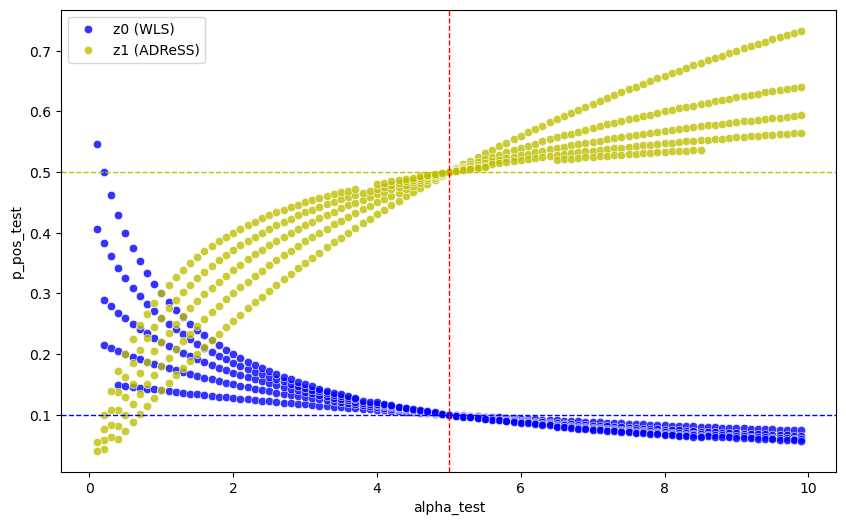

In [130]:
fig, ax = plt.subplots(figsize=(10,6))


sns.scatterplot(x="alpha_test", y="p_pos_test_z0", data=tmp[tmp['variable']==0], color="b", ax=ax, label="z0 (WLS)", alpha=0.8)
sns.scatterplot(x="alpha_test", y="p_pos_test_z1", data=tmp[tmp['variable']==0], color="y", ax=ax, label="z1 (ADReSS)", alpha=0.8)

ax.axhline(y=0.1, c="b", ls="--", linewidth=1)
ax.axhline(y=0.5, c="y", ls="--", linewidth=1)

ax.axvline(x=5, c="r", ls="--", linewidth=1)

ax.set_ylabel("p_pos_test")

<Figure size 1200x1000 with 0 Axes>

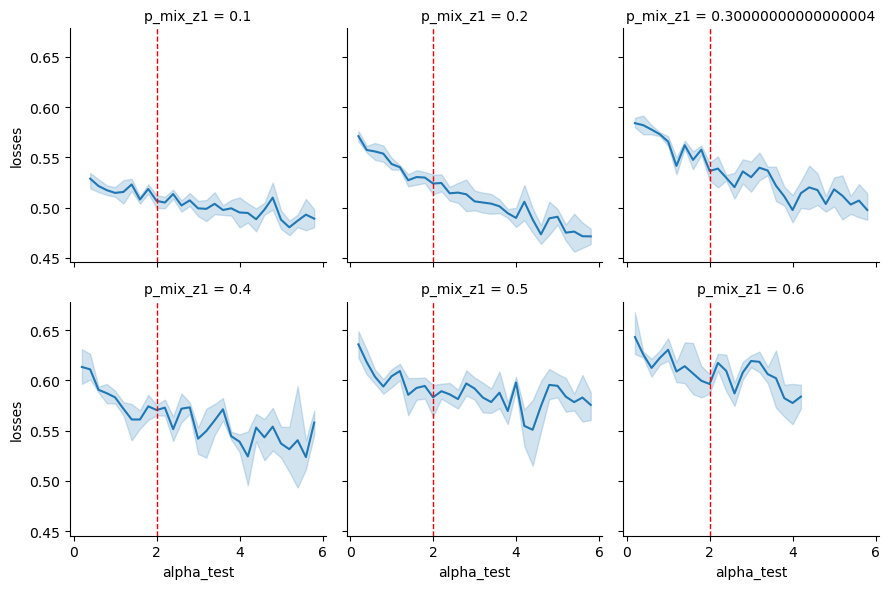

In [37]:
plotAlphaPmix(losses=losses_2, alpha_train=2, key_metric='losses')

<Figure size 1200x1000 with 0 Axes>

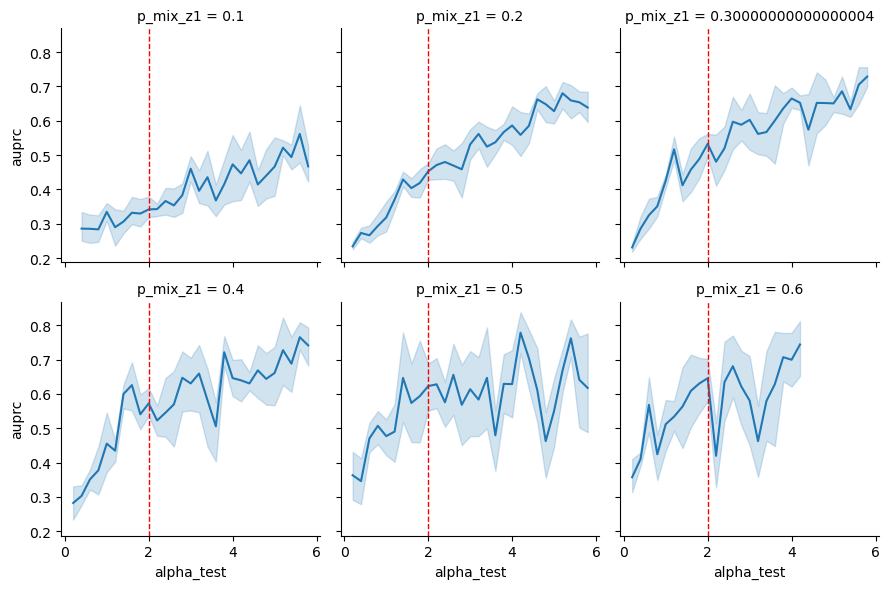

In [38]:
plotAlphaPmix(losses=losses_2, alpha_train=2, key_metric='auprc')

<Figure size 1200x1000 with 0 Axes>

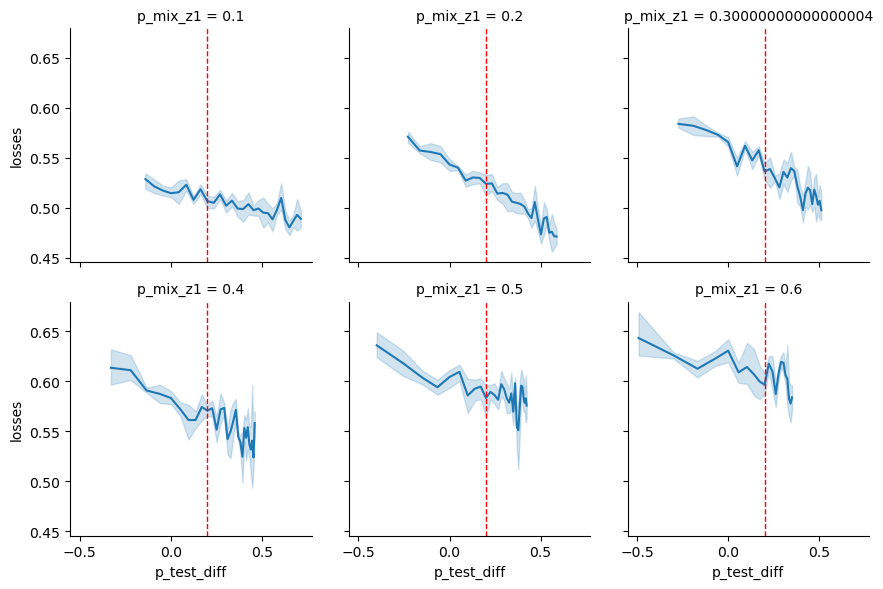

In [132]:
tmp = plotAlphaDiffPmix(losses=losses_2, alpha_diff_train=0.2, key_metric="losses")

In [133]:
tmp

,index,variable,value,p_mix_z1,alpha_test,p_pos_test_z0,p_pos_test_z1,p_test_diff
0,"(0.2, 0.4, 0.1, 0.4, 4)",0,0.535781,0.1,0.4,0.234043,0.093617,-0.140426
1,"(0.2, 0.4, 0.1, 0.6000000000000001, 4)",0,0.533263,0.1,0.6,0.229167,0.137500,-0.091667
2,"(0.2, 0.4, 0.1, 0.8, 4)",0,0.513482,0.1,0.8,0.224490,0.179592,-0.044898
3,"(0.2, 0.4, 0.1, 1.0, 4)",0,0.510786,0.1,1.0,0.220000,0.220000,0.000000
4,"(0.2, 0.4, 0.1, 1.2000000000000002, 4)",0,0.526859,0.1,1.2,0.215686,0.258824,0.043137
...,...,...,...,...,...,...,...,...
820,"(0.2, 0.4, 0.6, 3.4000000000000004, 4)",4,0.616917,0.6,3.4,0.131148,0.445902,0.314754
821,"(0.2, 0.4, 0.6, 3.6, 4)",4,0.582024,0.6,3.6,0.125000,0.450000,0.325000
822,"(0.2, 0.4, 0.6, 3.8000000000000003, 4)",4,0.585457,0.6,3.8,0.119403,0.453731,0.334328
823,"(0.2, 0.4, 0.6, 4.0, 4)",4,0.555685,0.6,4.0,0.114286,0.457143,0.342857


Text(0, 0.5, 'p_pos_test')

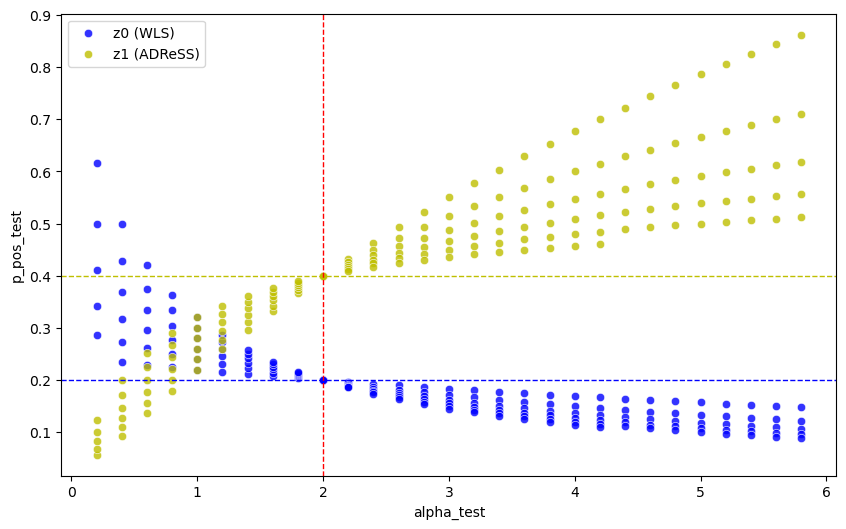

In [134]:
fig, ax = plt.subplots(figsize=(10,6))


sns.scatterplot(x="alpha_test", y="p_pos_test_z0", data=tmp[tmp['variable']==0], color="b", ax=ax, label="z0 (WLS)", alpha=0.8)
sns.scatterplot(x="alpha_test", y="p_pos_test_z1", data=tmp[tmp['variable']==0], color="y", ax=ax, label="z1 (ADReSS)", alpha=0.8)

ax.axhline(y=0.2, c="b", ls="--", linewidth=1)
ax.axhline(y=0.4, c="y", ls="--", linewidth=1)

ax.axvline(x=2, c="r", ls="--", linewidth=1)

ax.set_ylabel("p_pos_test")

In [51]:
tmp = pd.DataFrame.from_dict({c:losses_dict['losses'][idx] for idx,c in enumerate(losses_dict['combination'])},
                             orient="index"
                            )
tmp = tmp.reset_index()

tmp = pd.melt(tmp, id_vars="index", value_vars=[0,1,2,3,4])

tmp = tmp.assign(p_mix_z1=np.array(list(tmp['index']))[:,2], alpha_test=np.array(list(tmp['index']))[:,3])



tmp['alpha_test'] = tmp['alpha_test'].round(1) # for
tmp['p_mix_z1'] = tmp['p_mix_z1'].round(1) # for

[Text(0, 0.5, 'Losses')]

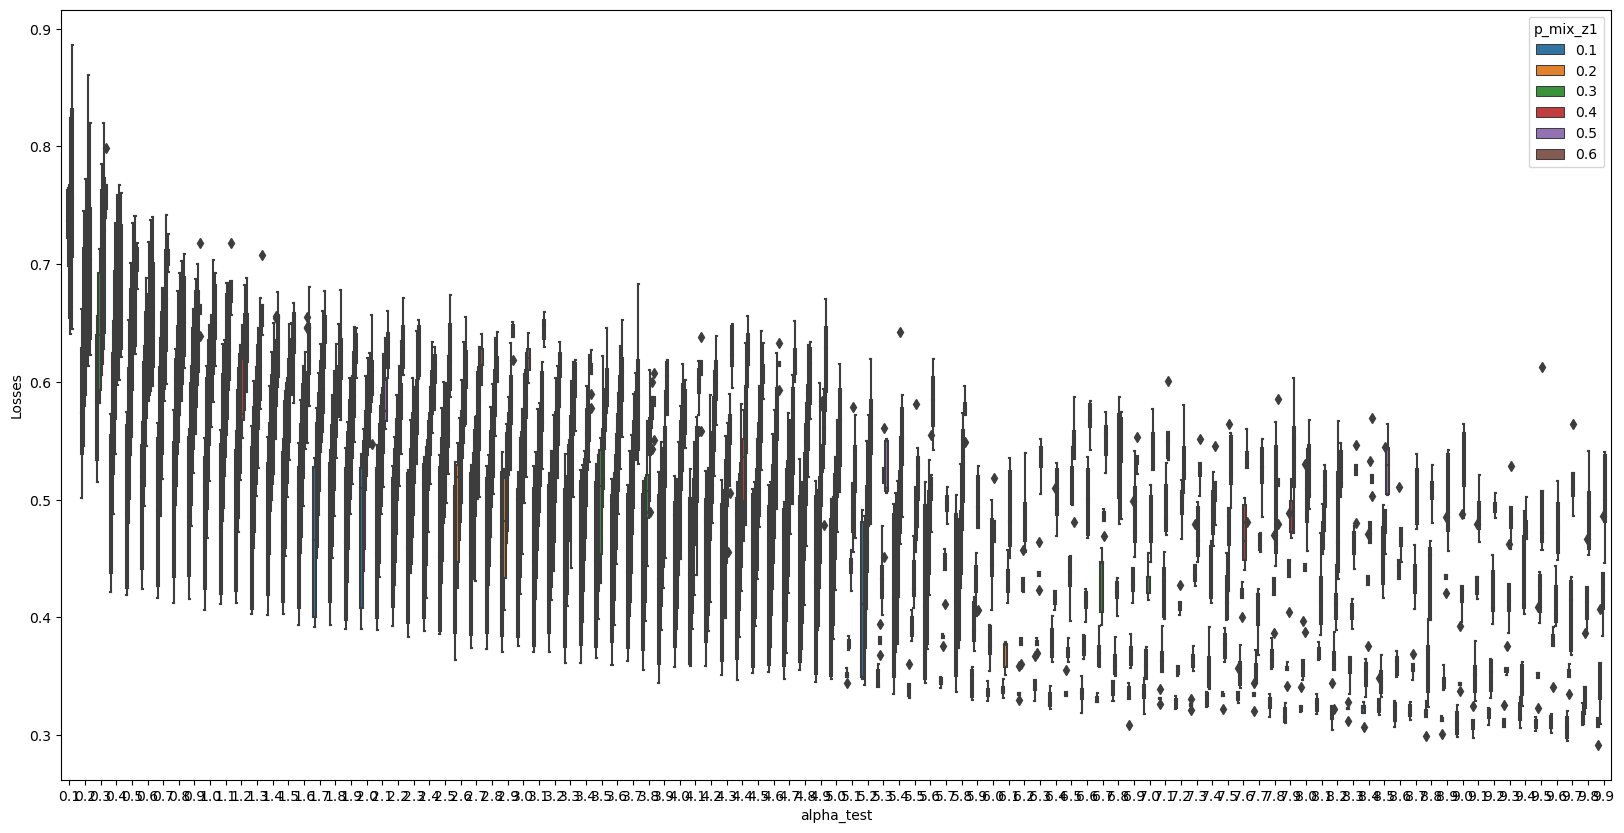

In [52]:


plt.figure(figsize=(20,10))
ax = sns.boxplot(x='alpha_test',y='value', 
            hue='p_mix_z1',
            data=tmp)
ax.set(ylabel="Losses")

In [298]:
np.array(losses_dict['combination'])[:,(2,3)]

array([[0.101, 1.   ],
       [0.101, 1.2  ],
       [0.101, 1.4  ],
       [0.201, 1.   ],
       [0.201, 1.2  ],
       [0.201, 1.4  ],
       [0.301, 1.   ],
       [0.301, 1.2  ],
       [0.301, 1.4  ],
       [0.401, 1.   ],
       [0.401, 1.2  ],
       [0.401, 1.4  ],
       [0.501, 1.   ],
       [0.501, 1.2  ],
       [0.501, 1.4  ],
       [0.601, 1.   ],
       [0.601, 1.2  ],
       [0.601, 1.4  ]])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5839d144f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5839d14bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5839d14190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5839d1c2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5839d1c610>],
 'means': []}

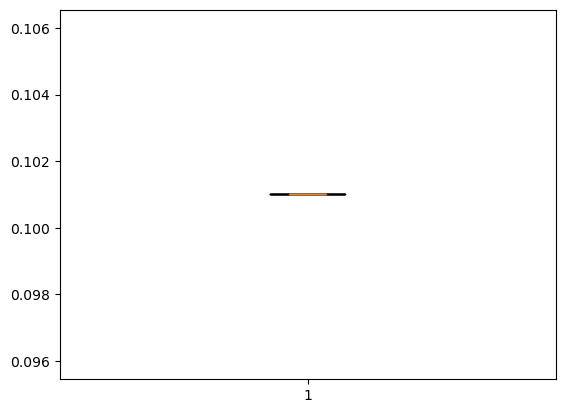

In [305]:
plt.boxplot(np.array(losses_dict['combination'])[:,2][:3],
            [losses_dict['losses'][0], losses_dict['losses'][1], losses_dict['losses'][2]])

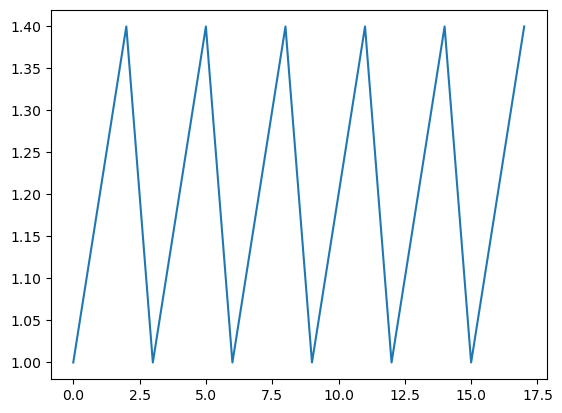

In [307]:

plt.plot(np.array(losses_dict['combination'])[:,3])

In [306]:
np.array(losses_dict['combination'])[:,2][:3]

array([0.101, 0.101, 0.101])